In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ppiech/openaigym/spinningup

In [2]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/new_intrinsic/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/new_intrinsic/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


ActionsAdvantageMean  ActionsClipFrac  ActionsEntropy  ActionsKL  \
0                 -6.258060         0.058750        0.904788   0.000226   
1                  0.482375         0.068333        0.901494   0.002728   
2                 -1.654393         0.120833        0.961477   0.004347   
3                  0.842434         0.142083        0.900047   0.008557   
4                 -0.106034         0.103750        0.875391   0.009929   
5                  0.462984         0.112083        0.864330   0.009459   
6                  0.179198         0.115417        0.835883   0.006142   
7                  0.218471         0.118750        0.851845   0.004081   
8                  0.199833         0.098750        0.813223   0.003119   
9                  0.246629         0.131667        0.825771   0.005859   
10                 0.287328         0.142917        0.789863   0.012696   
11                 0.187754         0.135833        0.791033   0.007353   
12                 0.272485         0.144583        0.803929   0.004882   
13                 0.189581         0.138750        0.810269   0.006786   
14                 0.257041         0.150000        0.789313   0.013594   
15                 0.238629         0.167500        0.744626   0.010254   
16                 0.214793         0.143750        0.714802   0.005150   
17                 0.318378         0.127917        0.690548   0.013132   
18                 0.235364         0.146250        0.696381   0.008765   
19                 0.302201         0.150000        0.695969   0.006378   
20                 0.027695         0.133750        0.667972   0.007580   
21                 0.353323         0.158750        0.640988   0.014496   
22                 0.305842         0.122500        0.631808   0.011977   
23                 0.251351         0.152083        0.666384   0.006416   
24                 0.140338         0.138750        0.661602   0.001753   
25                 0.443311         0.151667        0.626074   0.015380   
26                 0.214279         0.128333        0.615061   0.011986   
27                 0.119347         0.090833        0.650630  -0.000348   
28                 0.233394         0.133333        0.625074   0.009054   
29                 0.339604         0.106250        0.677802   0.003001   
...                     ...              ...             ...        ...   
18648              0.748502         0.085417       -1.605888   0.012562   
18649              0.843761         0.188750       -1.583262   0.015656   
18650              0.840231         0.089167       -1.622402   0.010479   
18651              1.159867         0.109583       -1.604908   0.014200   
18652              1.138409         0.185833       -1.660749   0.017044   
18653              0.386569         0.099583       -1.646344   0.014273   
18654              1.750968         0.213333       -1.647458   0.016357   
18655              0.793462         0.116250       -1.649952   0.012185   
18656             -1.077698         0.099583       -1.637961   0.011339   
18657              2.412066         0.212083       -1.639453   0.023273   
18658              0.570864         0.125417       -1.622729   0.015158   
18659              0.707625         0.077917       -1.640600   0.011533   
18660              0.958190         0.159167       -1.634083   0.010882   
18661              0.902997         0.083750       -1.641684   0.019292   
18662              1.367285         0.396667       -1.637234   0.048193   
18663              0.731978         0.067083       -1.649573   0.011887   
18664              0.713226         0.178333       -1.643355   0.024518   
18665              0.990846         0.199583       -1.603592   0.014697   
18666              0.780230         0.135417       -1.674269   0.015071   
18667              0.282953         0.144583       -1.667478   0.016681   
18668              0.756703         0.157500       -1.655960   0.013278   
18669              1.182441     

In [3]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
           'goal_octaves', 
           'goal_discount_rate', 
           'no_step_reward', 
           'forward_error_for_curiosity_reward',
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

exp_name  steps_per_epoch  goal_octaves  \
0            new_intrinsic_pendulum-v0_goa0-0_             2400             6   
3           new_intrinsic_pendulum-v0_goa0-1__             2400             6   
6        no_stability_in_goal_pendulum-v0_0-01             2400             6   
7             new_intrinsic_pendulum-v0_goa0-0             2400             6   
10            new_intrinsic_pendulum-v0_goa0-1             2400             6   
15           new_intrinsic_pendulum-v0_goa0-0_             2400             6   
19  new_no_step_reward_bipedalwalker-v2_goa0-0             4000             6   
23  new_no_step_reward_bipedalwalker-v2_goa0-1             4000             6   
33          new_intrinsic_pendulum-v0_goa0-0__             2400             6   
37           new_intrinsic_pendulum-v0_goa0-1_             2400             6   

    goal_discount_rate  no_step_reward  forward_error_for_curiosity_reward  
0                 0.00           False                                True  
3                 0.10            True                                True  
6                 0.01            True                               False  
7                 0.00           False                               False  
10                0.10           False                               False  
15                0.00            True                               False  
19                0.00            True                                True  
23                0.10            True                                True  
33                0.00            True                                True  
37                0.10           False                                True

/Users/ppiech/openaigym/spinningup/spinup/utils/plot.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat(data, ignore_index=True)
/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


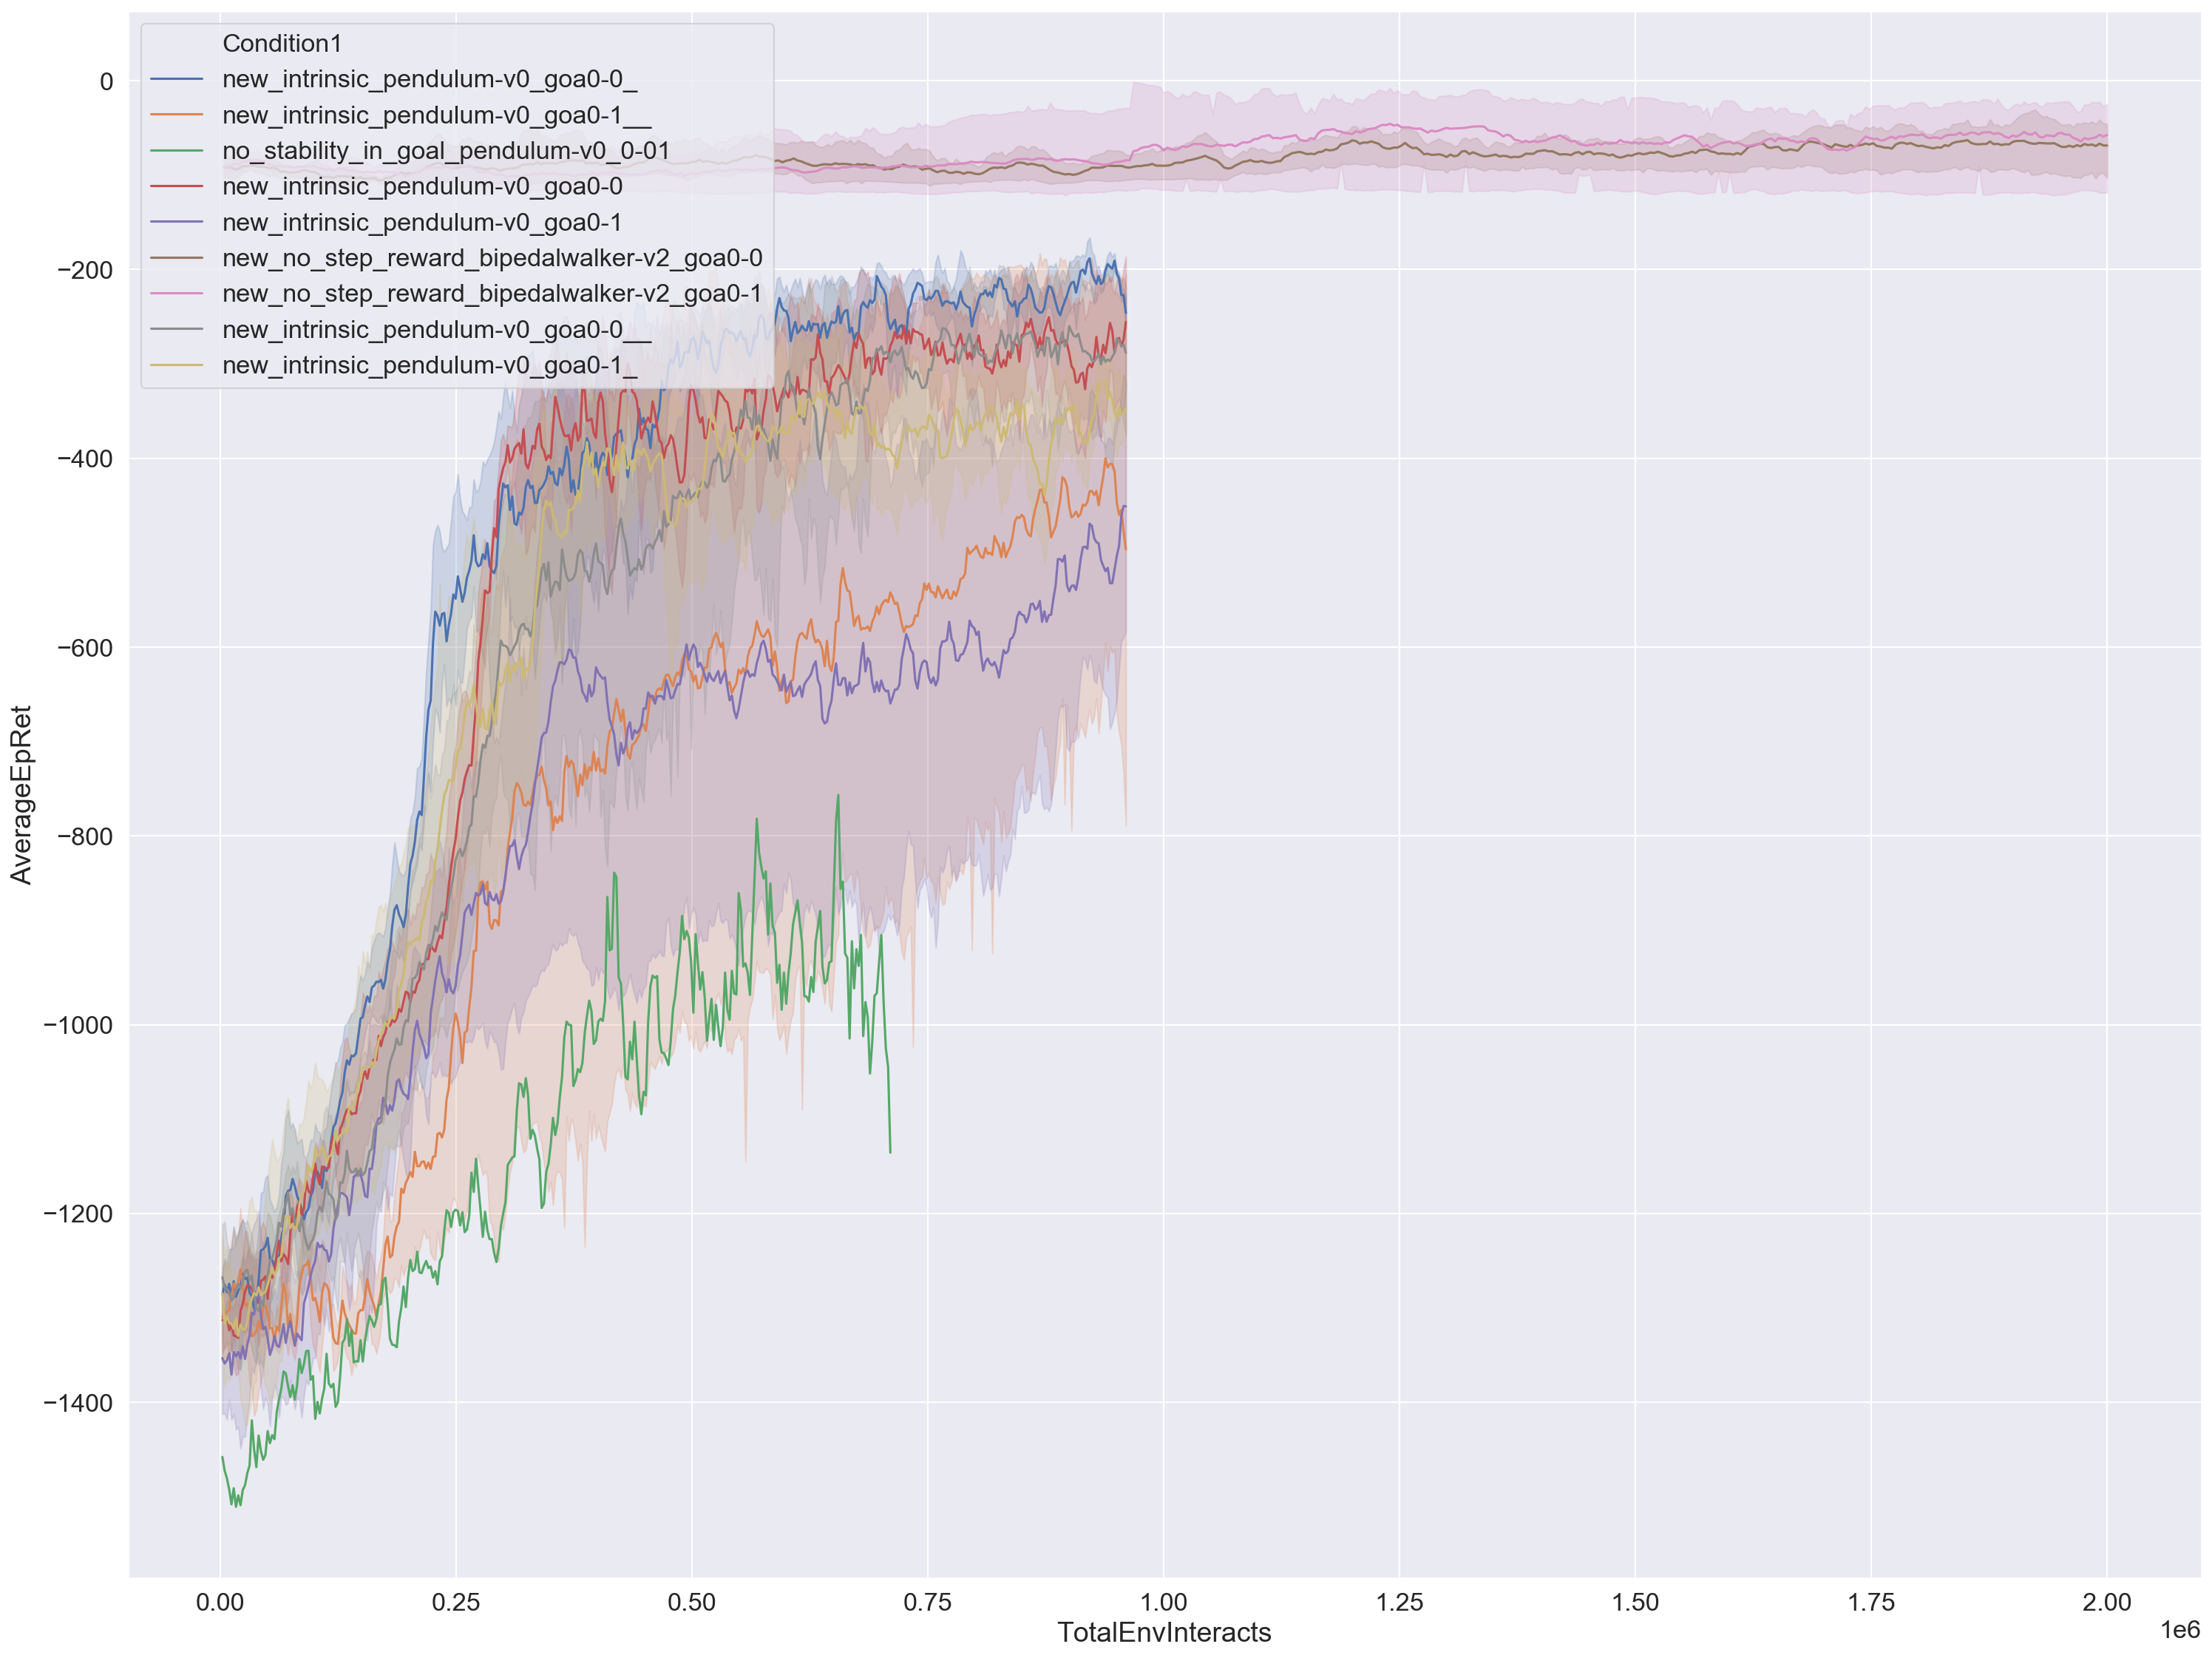

In [4]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, xaxis='TotalEnvInteracts')
plt.show()

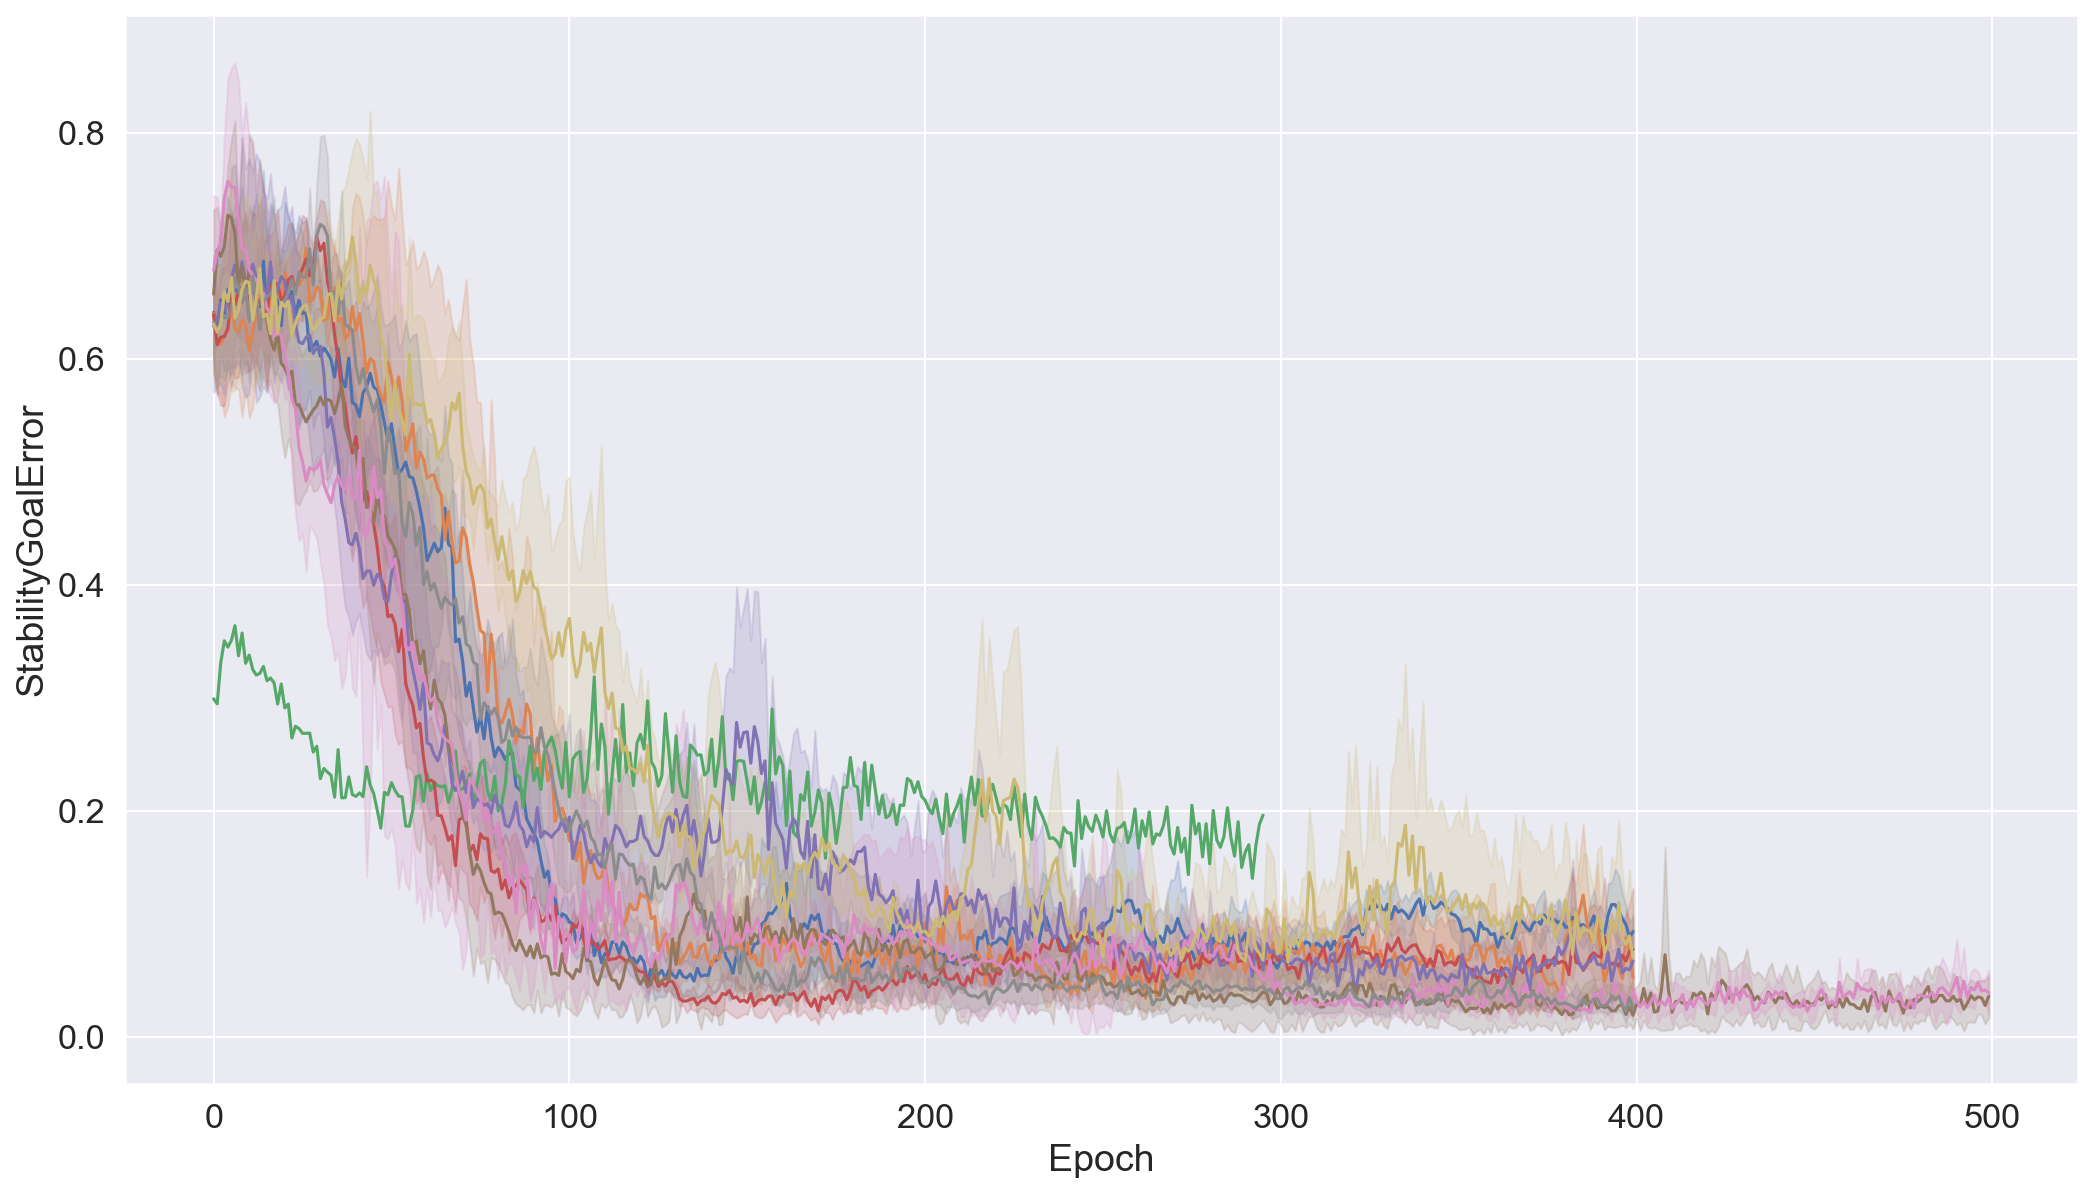

In [5]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

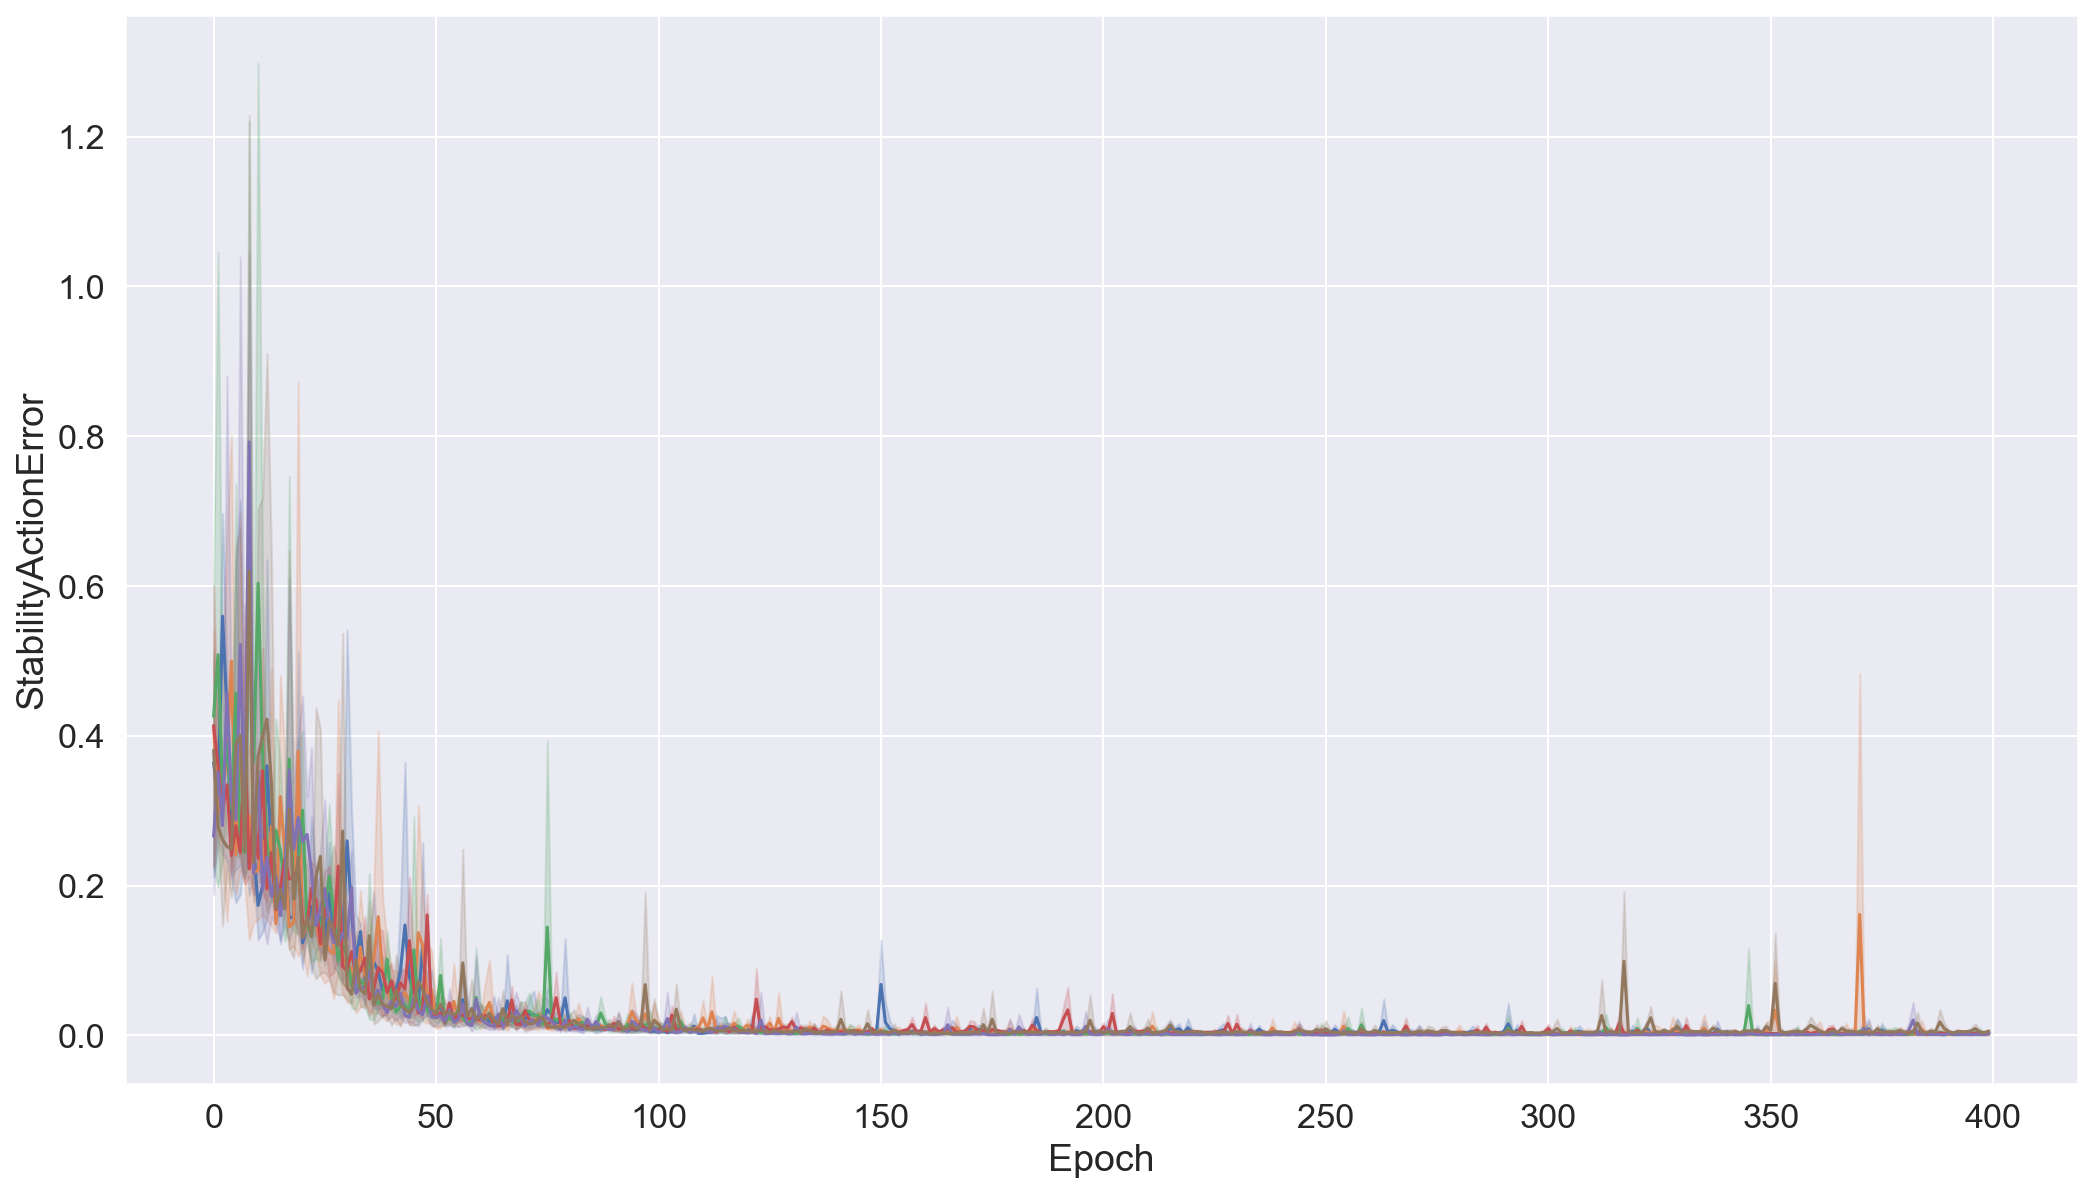

In [6]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

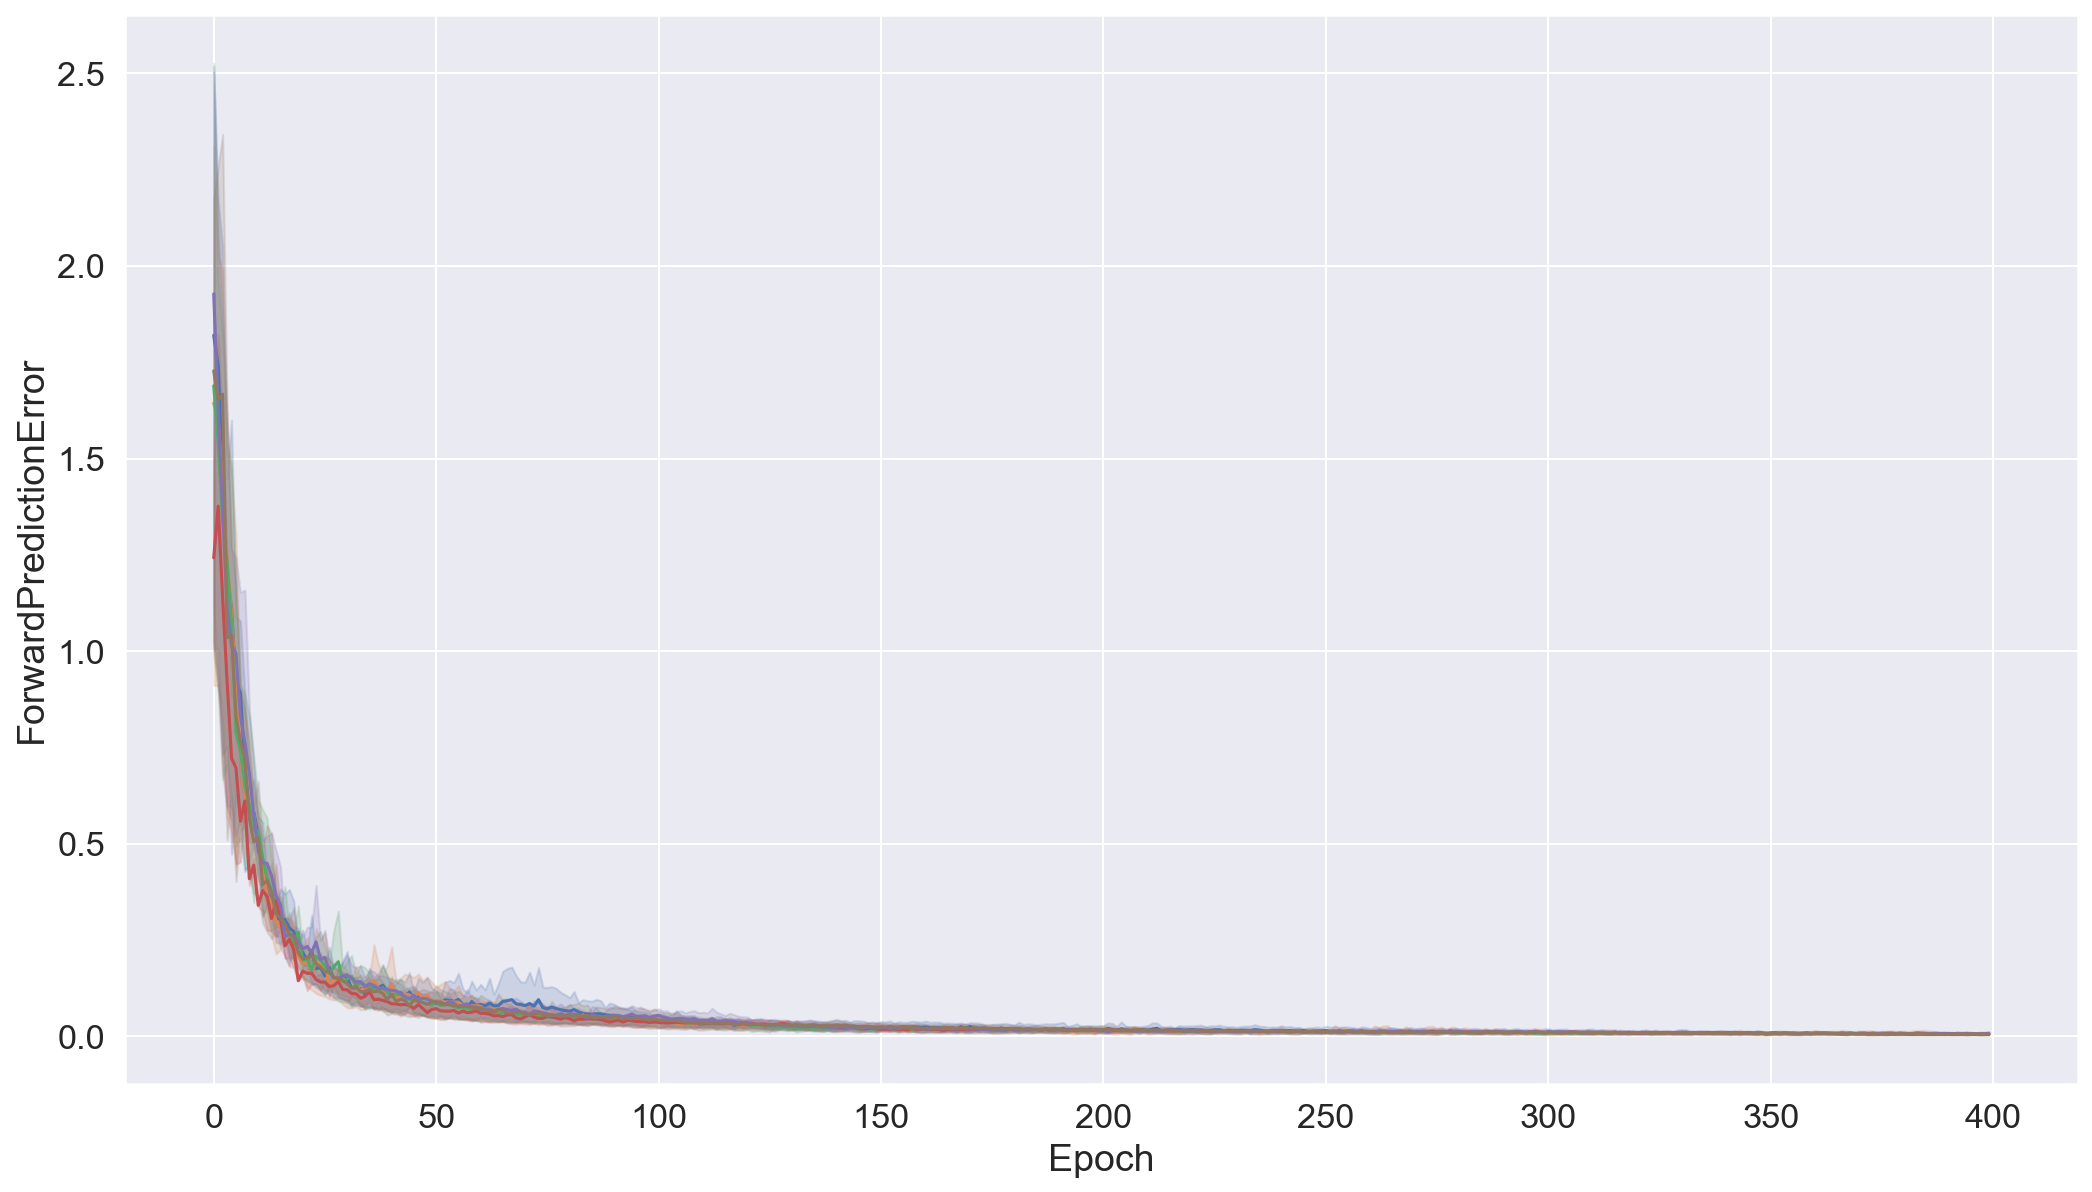

In [7]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ForwardPredictionError', smooth=1, show_legend=False)
plt.show()

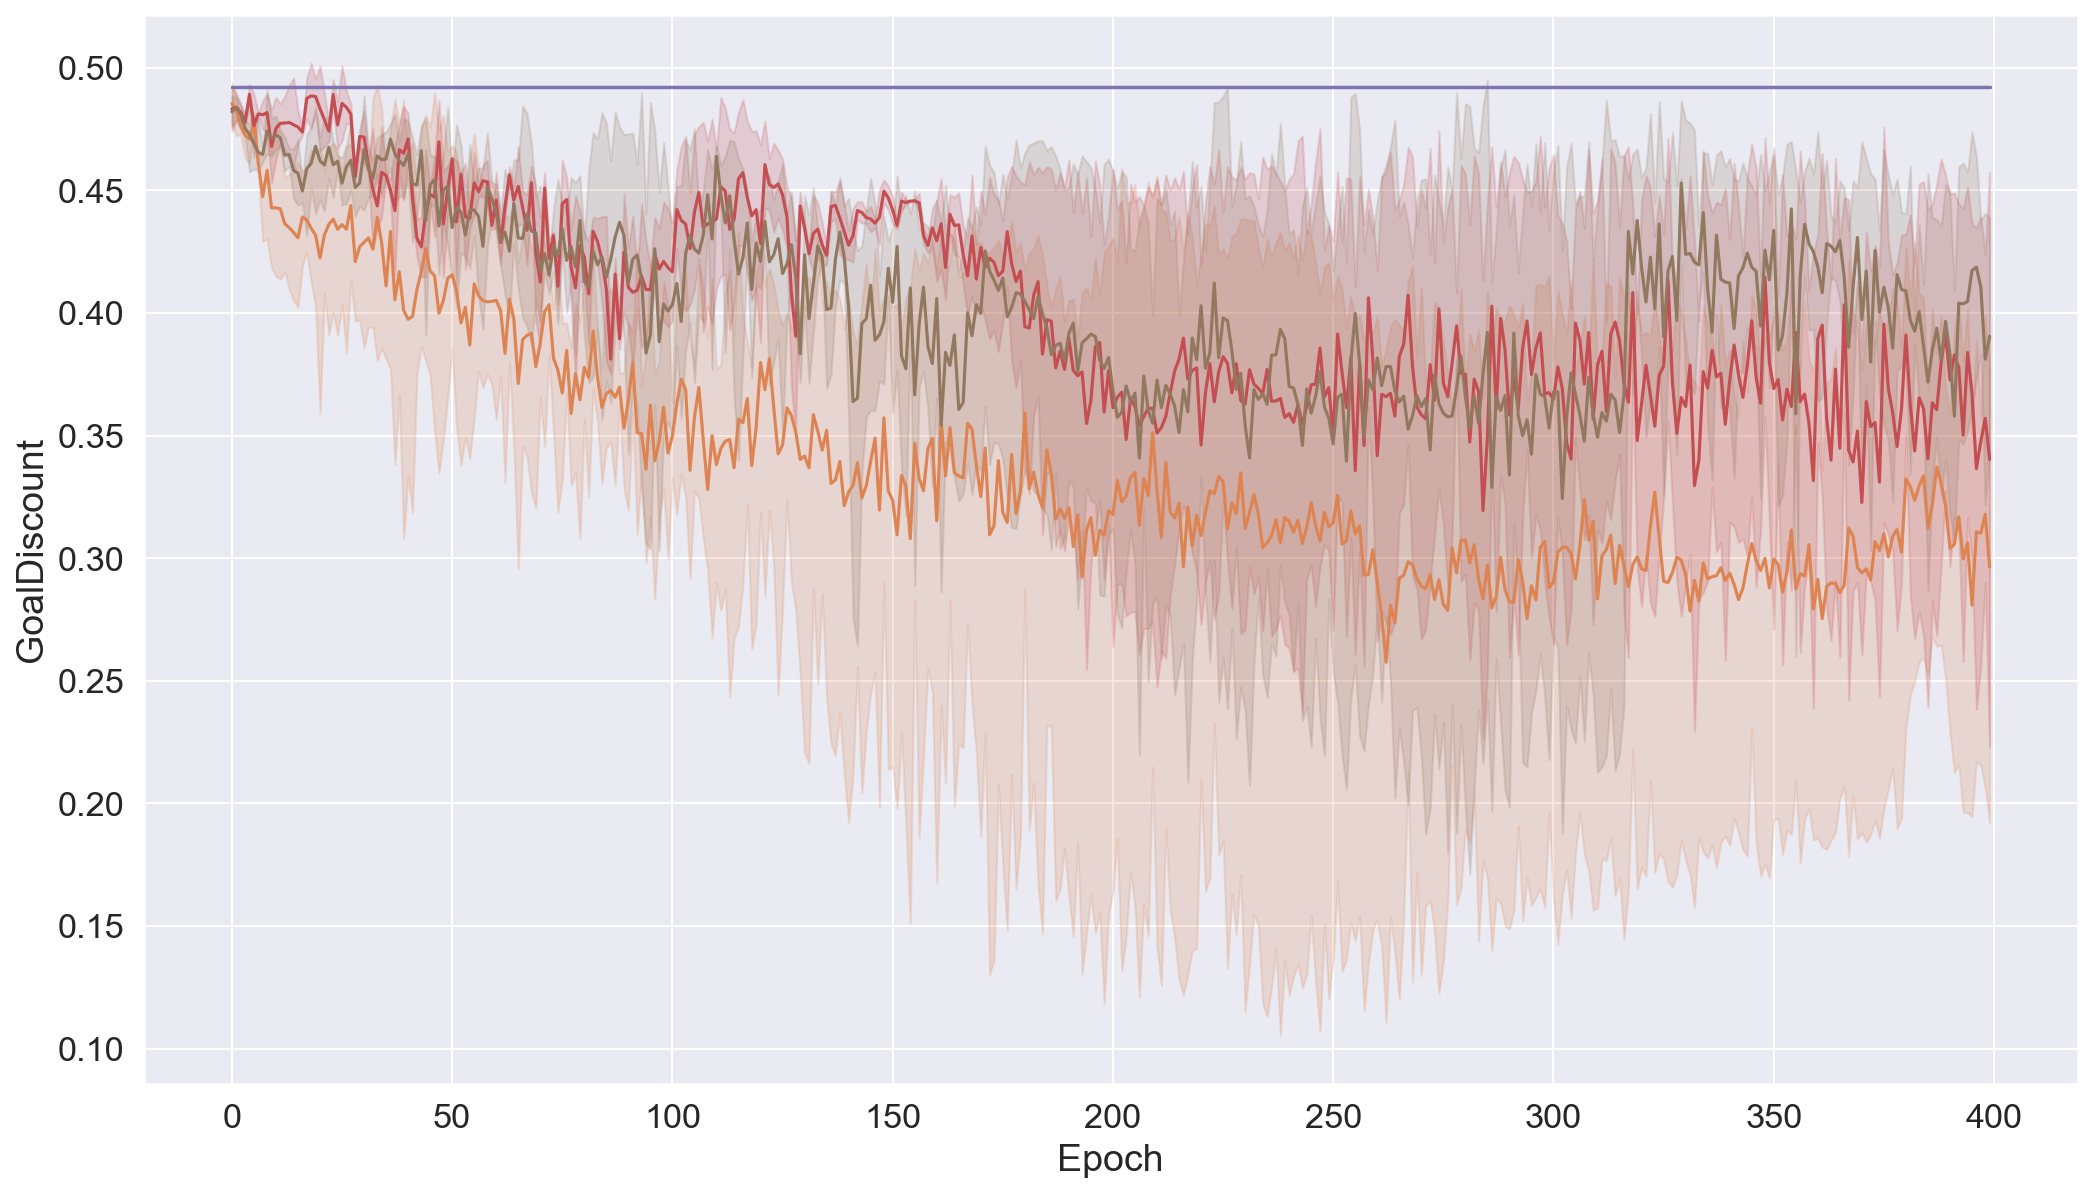

In [8]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalDiscount', smooth=1, show_legend=False)
plt.show()

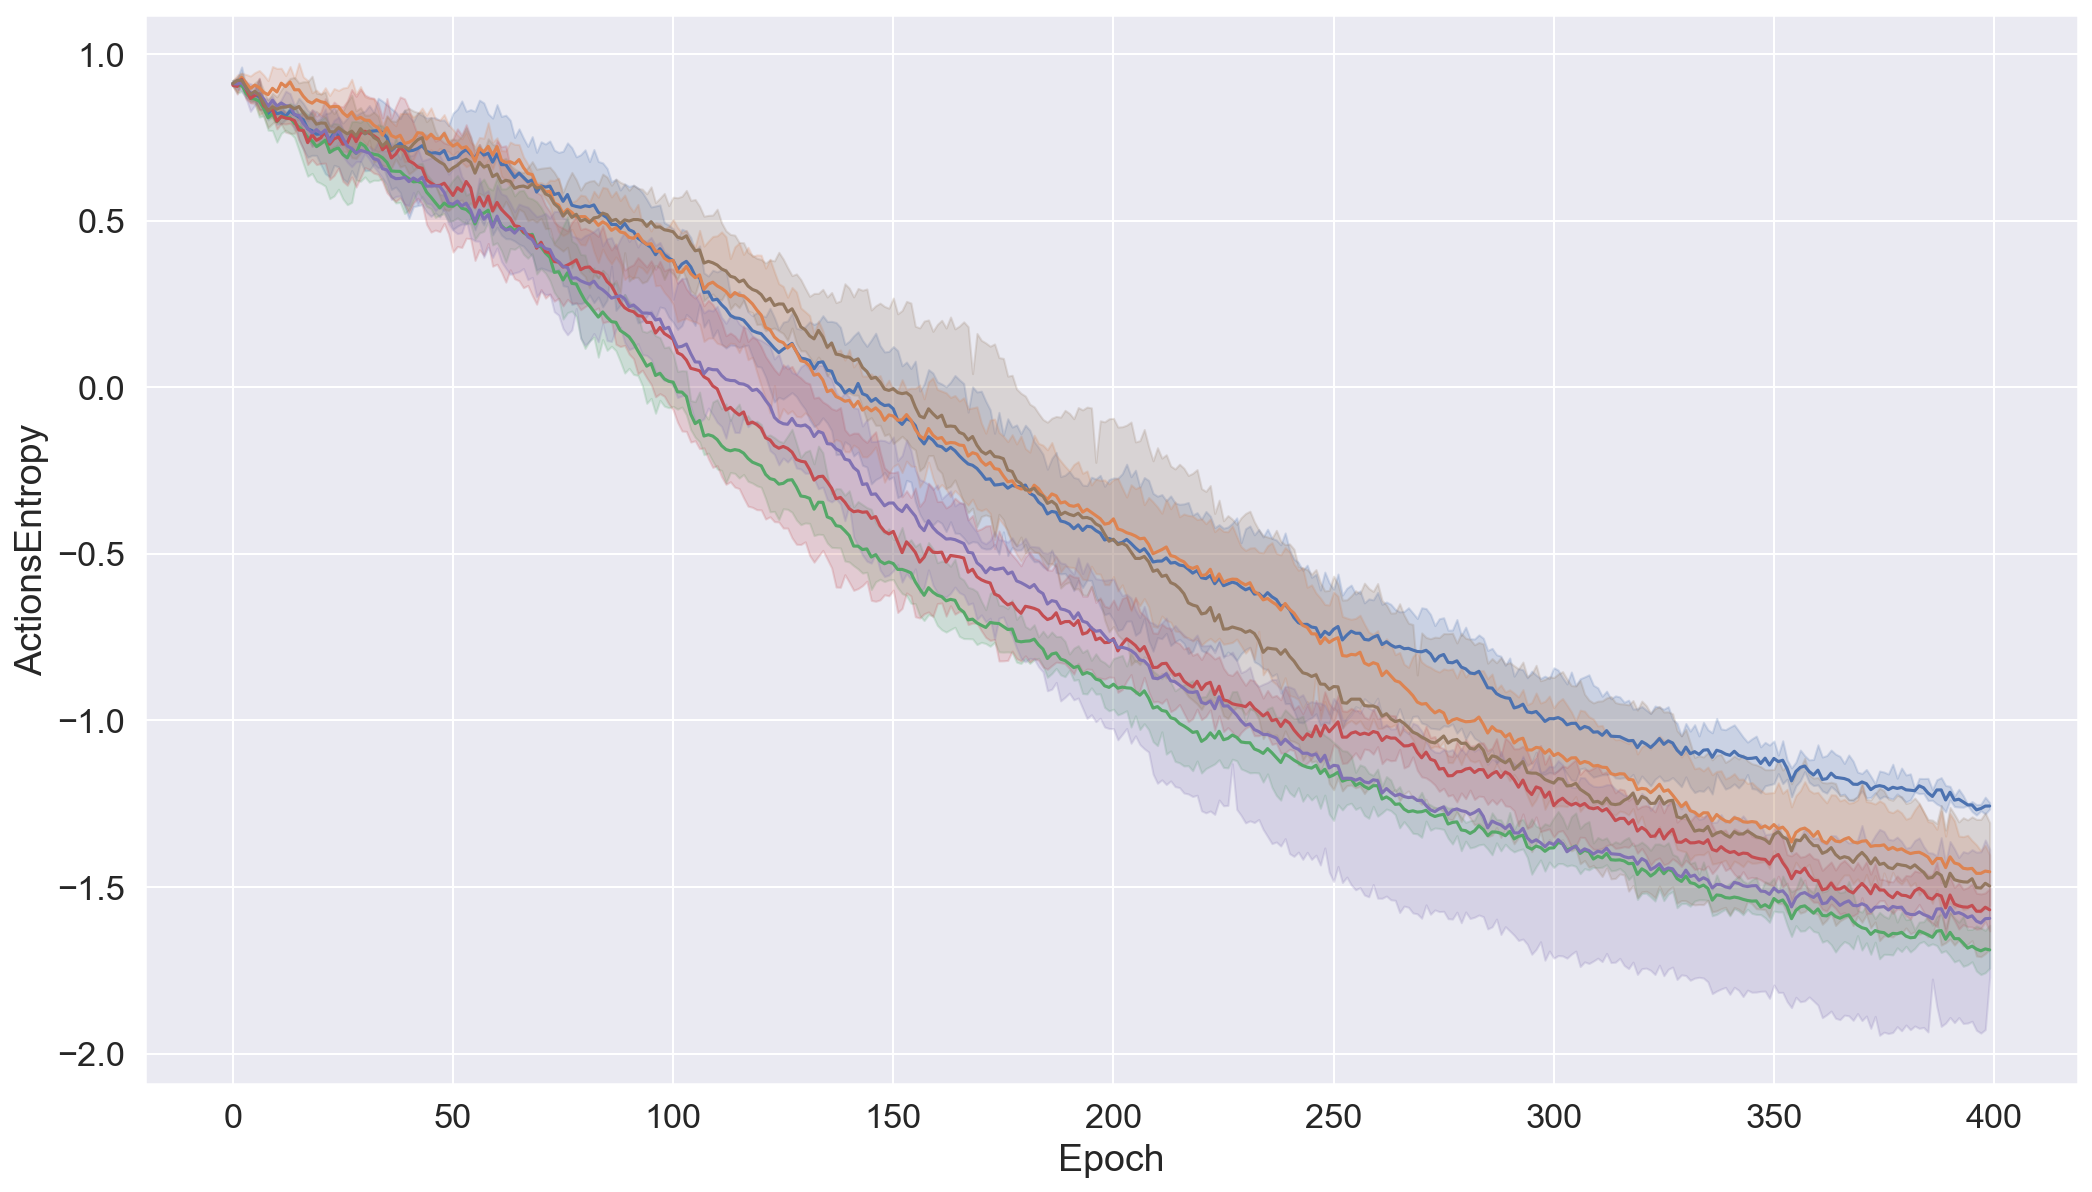

In [9]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

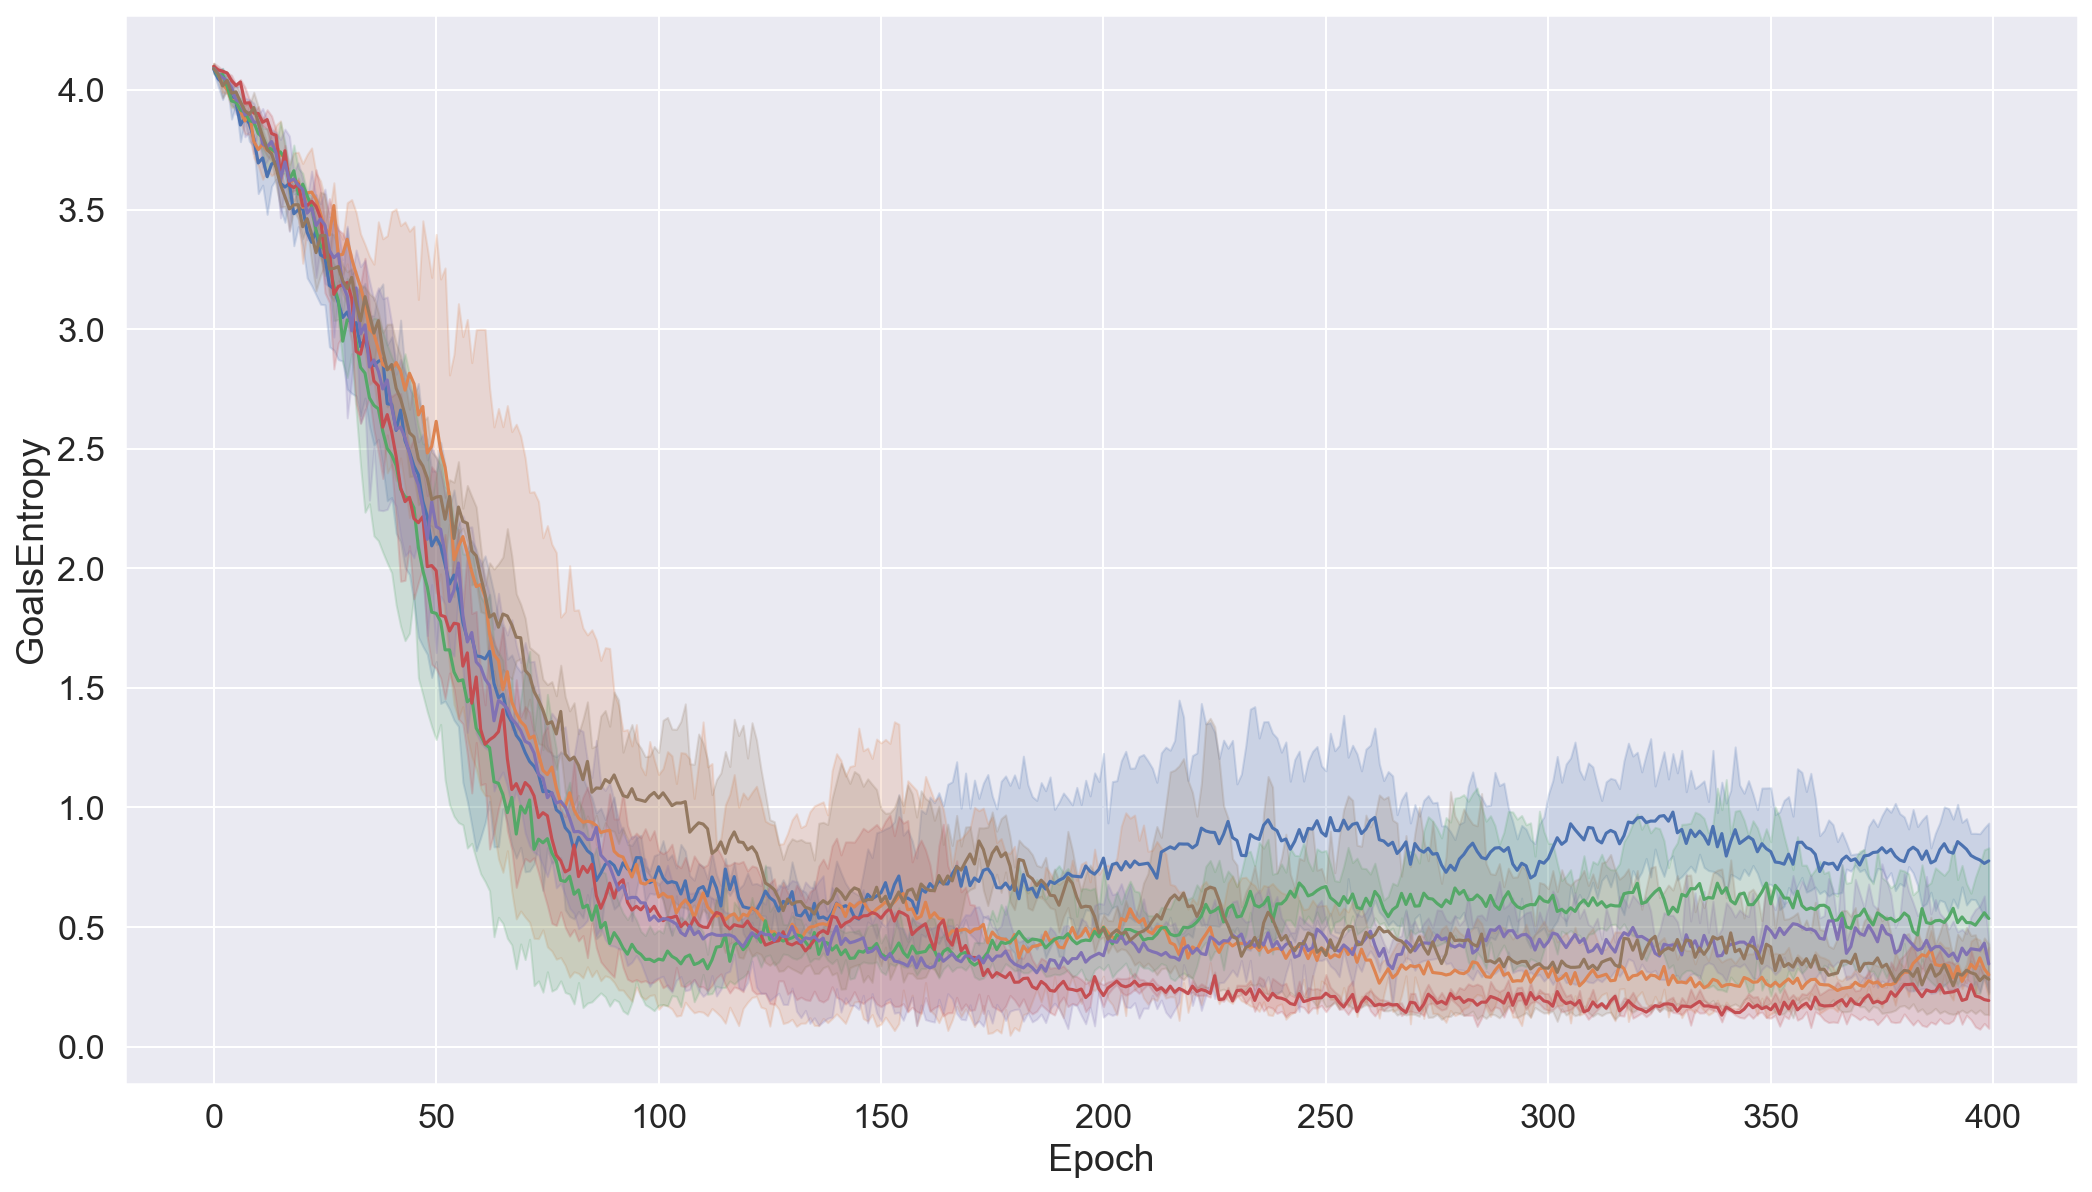

In [10]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

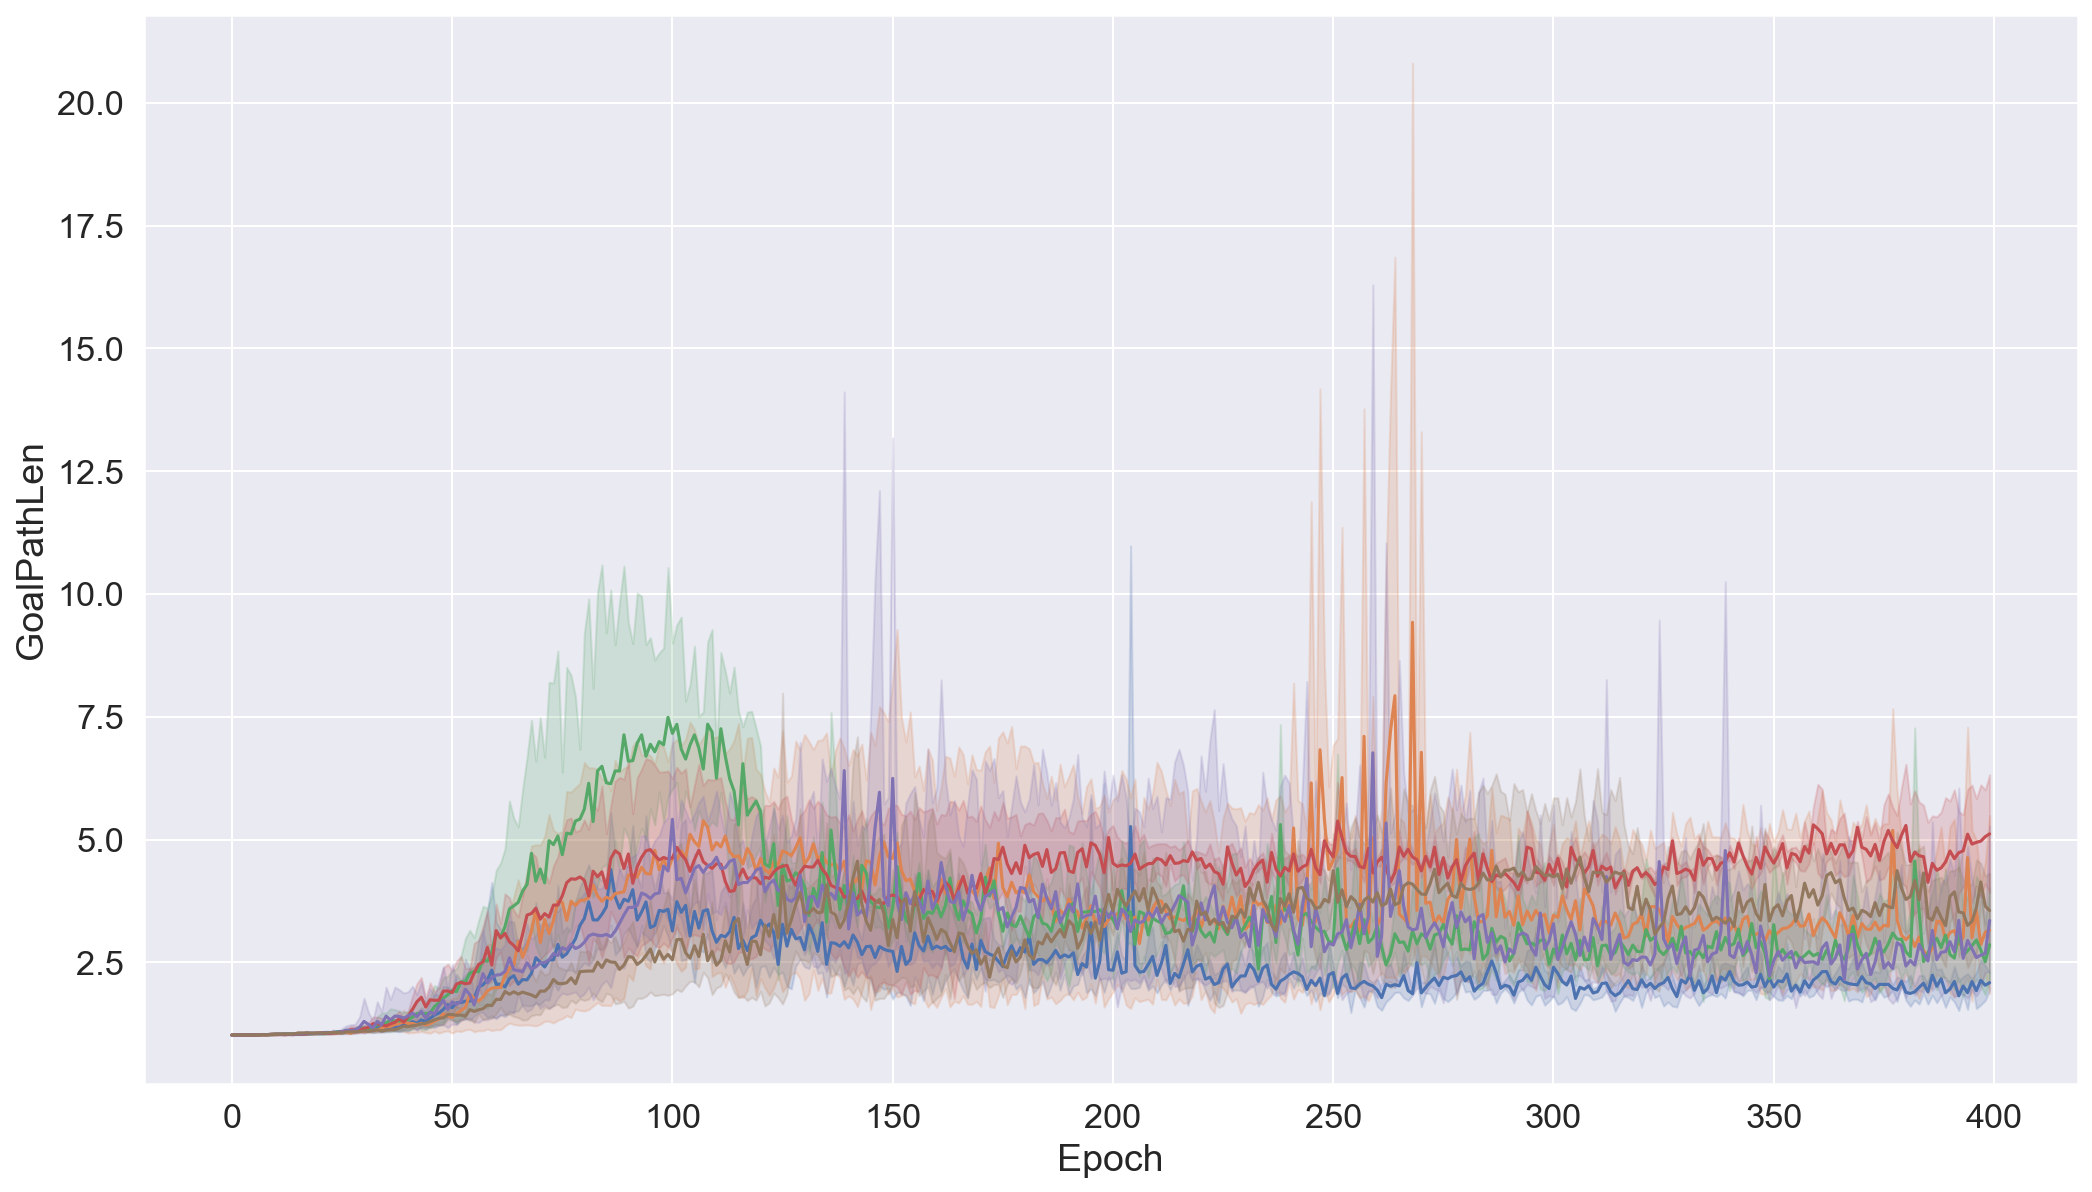

In [11]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()